In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

import seaborn as sns # library for data visualization and representation

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline


print('Libraries imported.')

Libraries imported.


#### Load and explore the data

Next, let's load the data.

In [2]:
fuel_data=pd.read_csv(r'https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv',
                      error_bad_lines=False) 

In [3]:
# Viewing the first five (5) rows of the data
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [4]:
# Dimensionality of the data
print('The dataframe has {} rows and {} columns.'.format(
        fuel_data.shape[0],
        fuel_data.shape[1]
    )
)

The dataframe has 29523 rows and 11 columns.


In [5]:
# descriptive statistics that summarize the central tendency, dispersion and shape of the fuel data distribution
fuel_data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [6]:
import scipy.stats as stats

In [7]:
stats.kurtosis(fuel_data['fuel_qty_burned'])

651.2589365474387

In [8]:
fuel_data.corr()['fuel_qty_burned']

utility_id_ferc1               -0.057447
report_year                     0.012952
fuel_qty_burned                 1.000000
fuel_mmbtu_per_unit            -0.080946
fuel_cost_per_unit_burned      -0.018535
fuel_cost_per_unit_delivered   -0.003551
fuel_cost_per_mmbtu            -0.001896
Name: fuel_qty_burned, dtype: float64

In [81]:
fuel_data.groupby('report_year').count()

,record_id,utility_id_ferc1,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,fcu
report_year,,,,,,,,,,,
1994,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235
1995,1201,1201,1201,1201,1201,1201,1201,1201,1201,1201,1201
1996,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088
1997,1094,1094,1094,1094,1094,1094,1094,1094,1094,1094,1094
1998,1107,1107,1107,1107,1107,1107,1107,1107,1107,1107,1107
1999,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050
2000,1373,1373,1373,1373,1373,1373,1373,1373,1373,1373,1373
2001,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356
2002,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205


In [10]:
# viewing the data type of each column in the dataframe
fuel_data.dtypes

record_id                        object
utility_id_ferc1                  int64
report_year                       int64
plant_name_ferc1                 object
fuel_type_code_pudl              object
fuel_unit                        object
fuel_qty_burned                 float64
fuel_mmbtu_per_unit             float64
fuel_cost_per_unit_burned       float64
fuel_cost_per_unit_delivered    float64
fuel_cost_per_mmbtu             float64
dtype: object

In [11]:
fuel_data['fcu']=fuel_data['fuel_qty_burned']*fuel_data['fuel_cost_per_unit_burned']

In [12]:
fuel_data.groupby('report_year').mean()['fuel_cost_per_unit_delivered'].idxmax()

1997

In [13]:
# loading the information about the dataframe
fuel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 12 columns):
record_id                       29523 non-null object
utility_id_ferc1                29523 non-null int64
report_year                     29523 non-null int64
plant_name_ferc1                29523 non-null object
fuel_type_code_pudl             29523 non-null object
fuel_unit                       29343 non-null object
fuel_qty_burned                 29523 non-null float64
fuel_mmbtu_per_unit             29523 non-null float64
fuel_cost_per_unit_burned       29523 non-null float64
fuel_cost_per_unit_delivered    29523 non-null float64
fuel_cost_per_mmbtu             29523 non-null float64
fcu                             29523 non-null float64
dtypes: float64(6), int64(2), object(4)
memory usage: 2.7+ MB


### Dealing with null values

In [14]:
# Checking for the presence of null values
fuel_data.isnull().any()

record_id                       False
utility_id_ferc1                False
report_year                     False
plant_name_ferc1                False
fuel_type_code_pudl             False
fuel_unit                        True
fuel_qty_burned                 False
fuel_mmbtu_per_unit             False
fuel_cost_per_unit_burned       False
fuel_cost_per_unit_delivered    False
fuel_cost_per_mmbtu             False
fcu                             False
dtype: bool

In [15]:
# Checking for the total amount of null values
fuel_data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
fcu                               0
dtype: int64

In [16]:
# Checking for the rows with null values
bool_series = pd.isnull(fuel_data["fuel_unit"]) 
  
# filtering data 
# displaying data only with row value = NaN 
y=fuel_data[bool_series]

### From obseration and analysis the fuel_type_code_pudl is associated with the fuel_unit

In [17]:
# Getting unique values of the fuel_type_code_pudl series
fuel_data['fuel_type_code_pudl'].unique()

array(['coal', 'gas', 'nuclear', 'oil', 'waste', 'other'], dtype=object)

In [18]:
# Getting unique values of the fuel_unit series
fuel_data['fuel_unit'].unique()

array(['ton', 'mcf', 'kgU', 'bbl', 'gramsU', nan, 'mwdth', 'mmbtu',
       'mwhth', 'gal'], dtype=object)

In [19]:
# Getting unique values of the waste_unit series
fuel_waste=fuel_data[fuel_data['fuel_type_code_pudl']=='waste']
fuel_waste['fuel_unit'].unique()

array(['ton', 'bbl', nan], dtype=object)

In [20]:
# Getting unique values of the gas_unit series
fuel_gas=fuel_data[fuel_data['fuel_type_code_pudl']=='gas']
fuel_gas['fuel_unit'].unique()

array(['mcf', 'mmbtu', nan, 'ton', 'bbl'], dtype=object)

In [21]:
# Getting unique values of the nuclear_unit series
fuel_nuclear=fuel_data[fuel_data['fuel_type_code_pudl']=='nuclear']
fuel_nuclear['fuel_unit'].unique()

array(['kgU', 'gramsU', 'mwdth', nan, 'mmbtu', 'mwhth'], dtype=object)

In [22]:
# Getting unique values of the oil_unit series
fuel_oil=fuel_data[fuel_data['fuel_type_code_pudl']=='oil']
fuel_oil['fuel_unit'].unique()

array(['bbl', nan, 'gal', 'mcf', 'ton'], dtype=object)

In [23]:
# Getting unique values of the other_unit series
fuel_other=fuel_data[fuel_data['fuel_type_code_pudl']=='other']
fuel_other['fuel_unit'].unique()

array(['bbl', nan, 'ton', 'mcf', 'gal'], dtype=object)

In [24]:
# Getting unique values of the coal_unit series
fuel_coal=fuel_data[fuel_data['fuel_type_code_pudl']=='coal']
fuel_coal['fuel_unit'].unique()

array(['ton', 'bbl', nan, 'mcf', 'mmbtu'], dtype=object)

In [49]:
fuel_gas.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,fcu
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000000,2.77,2.77,2.57,112276.41
10,f1_fuel_1994_12_4_0_2,4,1994,units 1-3,gas,mcf,262720.0,1.026000,1.94,1.94,13.90,509676.80
12,f1_fuel_1994_12_4_0_5,4,1994,unit 4,gas,mcf,6673.0,1.026000,1.94,1.94,1.90,12945.62
28,f1_fuel_1994_12_7_0_3,7,1994,"cholla units 1,2,3",gas,mcf,38086.0,0.880901,2.49,2.48,2.82,94834.14
30,f1_fuel_1994_12_7_0_8,7,1994,4 corners,gas,mcf,230205.0,1.015424,2.69,2.69,2.65,619251.45


In [50]:
fuel_waste.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,fcu
49,f1_fuel_1994_12_9_0_3,9,1994,b.l. england,waste,ton,2438.0,0.015939,34.180,34.180,1.072,83330.840
230,f1_fuel_1994_12_61_0_13,61,1994,joseph mcneil,waste,ton,13372.0,0.004750,25.190,25.530,2.650,336840.680
431,f1_fuel_1994_12_121_0_9,121,1994,bay front,waste,ton,207242.0,0.207242,9.325,8.213,0.877,1932531.650
433,f1_fuel_1994_12_121_0_13,121,1994,french island,waste,ton,120136.0,0.003033,6.682,3.230,1.102,802748.752
434,f1_fuel_1994_12_121_0_14,121,1994,french island,waste,ton,51728.0,0.005846,-35.100,-35.380,-3.003,-1815652.800


In [51]:
fuel_oil.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,fcu
14,f1_fuel_1994_12_6_0_2,6,1994,clinch river,oil,bbl,6510.0,5.875338,32.130,23.444,5.469,209166.300
19,f1_fuel_1994_12_6_0_14,6,1994,kanawha river,oil,bbl,3505.0,5.774958,33.321,26.280,5.770,116790.105
21,f1_fuel_1994_12_6_1_8,6,1994,mountainr,oil,bbl,50013.0,5.845644,30.319,23.884,5.187,1516344.147
23,f1_fuel_1994_12_6_1_11,6,1994,philip sporn-apco,oil,bbl,13969.0,5.742870,32.184,30.508,5.604,449578.296
25,f1_fuel_1994_12_6_1_14,6,1994,philip sporn ttl plt,oil,bbl,48750.0,5.742828,32.186,30.507,5.605,1569067.500


In [52]:
fuel_other.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,fcu
84,f1_fuel_1994_12_11_0_6,11,1994,w.f. wyman,other,bbl,55652.0,0.149719,14.685,15.09,2.335,817249.620
203,f1_fuel_1994_12_54_0_6,54,1994,w.f. wyman unit 4,other,bbl,1217.0,0.149719,14.685,15.09,2.335,17871.645
228,f1_fuel_1994_12_61_0_9,61,1994,wyman,other,bbl,7639.0,0.149719,14.685,15.09,2.335,112178.715
277,f1_fuel_1994_12_74_0_3,74,1994,perry k & w,other,NaN,2654942.0,0.100000,0.044,0.00,0.440,116817.448
349,f1_fuel_1994_12_99_0_1,99,1994,eaton,other,bbl,75.0,0.139136,0.530,0.00,3.830,39.750


In [53]:
fuel_coal.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,fcu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121,9.996752e+07
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120,1.948474e+08
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650,1.183133e+08
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970,1.765410e+08
5,f1_fuel_1994_12_2_0_13,2,1994,e. c. gaston-unit 5,coal,ton,2124933.0,23.922,44.24,43.25,1.850,9.400704e+07


In [54]:
fuel_nuclear.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,fcu
6,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,nuclear,kgU,2260.0,0.064094,28.77,0.0,0.450,65020.20
45,f1_fuel_1994_12_7_3_1,7,1994,"palo verde 1,2,3",nuclear,kgU,1066.0,0.066705,40803.00,1550.0,0.580,43495998.00
52,f1_fuel_1994_12_9_0_8,9,1994,pch bt 2&3,nuclear,gramsU,204246.0,0.000065,44.00,0.0,0.679,8986824.00
53,f1_fuel_1994_12_9_0_11,9,1994,salem 1 &2,nuclear,gramsU,139013.0,0.000066,41.31,0.0,0.623,5742627.03
54,f1_fuel_1994_12_9_0_14,9,1994,hope ck 1,nuclear,gramsU,61570.0,0.000062,37.51,0.0,0.603,2309490.70


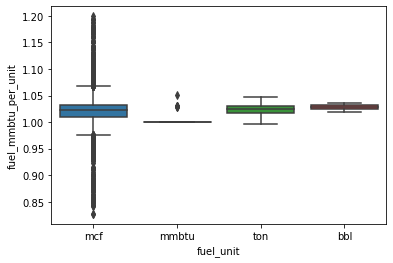

In [33]:
sns.boxplot(y=fuel_gas['fuel_mmbtu_per_unit'],x=fuel_gas['fuel_unit'])

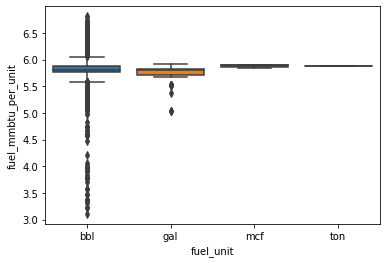

In [34]:
sns.boxplot(y=fuel_oil['fuel_mmbtu_per_unit'],x=fuel_oil['fuel_unit'])

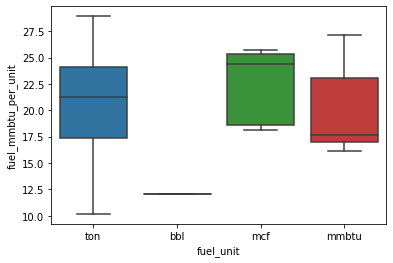

In [35]:
sns.boxplot(y=fuel_coal['fuel_mmbtu_per_unit'],x=fuel_coal['fuel_unit'])

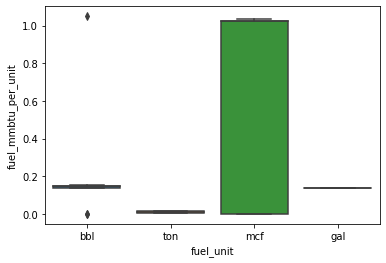

In [36]:
sns.boxplot(y=fuel_other['fuel_mmbtu_per_unit'],x=fuel_other['fuel_unit'])

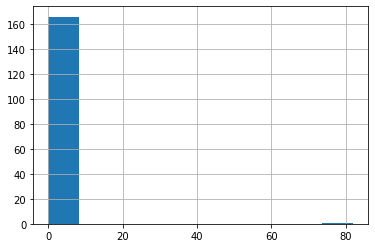

In [37]:
fuel_other['fuel_mmbtu_per_unit'].hist()

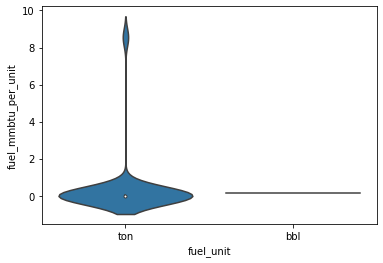

In [38]:
sns.violinplot(y=fuel_waste['fuel_mmbtu_per_unit'],x=fuel_waste['fuel_unit'])

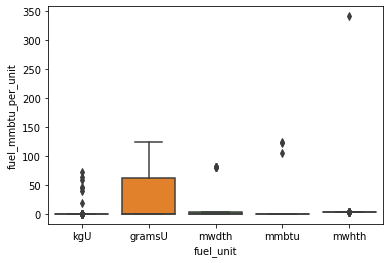

In [39]:
sns.boxplot(y=fuel_nuclear['fuel_mmbtu_per_unit'],x=fuel_nuclear['fuel_unit'])

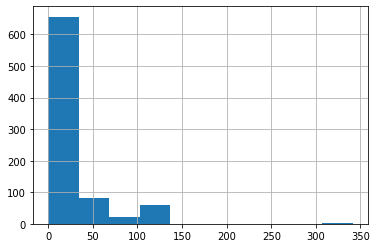

In [40]:
fuel_nuclear['fuel_mmbtu_per_unit'].hist()

In [58]:
# filling NaN values based on mode for each fuel unit
lis=[]
for a,b in zip(fuel_data['fuel_type_code_pudl'],fuel_data['fuel_unit']):
    if b is np.nan:
        if a=='gas':
            lis.append('mcf')
        elif a=='oil':
            lis.append('bbl')
        elif a=='coal':
            lis.append('ton')
        elif a=='other':
            lis.append('mcf')
        elif a=='waste':
            lis.append('ton')
        elif a=='nuclear':
            lis.append('gramsU')
    else:
        lis.append(b)

        
fuel_data['fuel_unit']=lis

In [59]:
# Checking for the total amount of null values
fuel_data.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
fcu                             0
dtype: int64

In [63]:
# total amount of quantity burned per year
fuel_data.groupby('report_year').sum()['fuel_qty_burned']

report_year
1994    3.364163e+09
1995    4.458192e+09
1996    2.768693e+09
1997    3.077973e+09
1998    3.617070e+09
1999    3.445345e+09
2000    3.394100e+09
2001    3.147821e+09
2002    2.585502e+09
2003    2.287121e+09
2004    2.124797e+09
2005    2.244703e+09
2006    2.432879e+09
2007    2.573119e+09
2008    2.513047e+09
2009    2.633401e+09
2010    3.056312e+09
2011    3.052052e+09
2012    3.414637e+09
2013    3.287065e+09
2014    3.161710e+09
2015    3.650763e+09
2016    3.818861e+09
2017    3.329380e+09
2018    3.974124e+09
Name: fuel_qty_burned, dtype: float64

In [74]:
# average amount of quantity burned per year
fuel_data.groupby('report_year').mean()['fuel_qty_burned']

report_year
1994    2.724018e+06
1995    3.712067e+06
1996    2.544754e+06
1997    2.813503e+06
1998    3.267453e+06
1999    3.281281e+06
2000    2.472032e+06
2001    2.321402e+06
2002    2.145645e+06
2003    1.888622e+06
2004    1.782547e+06
2005    1.768876e+06
2006    1.957264e+06
2007    2.035696e+06
2008    2.046455e+06
2009    2.154993e+06
2010    2.423720e+06
2011    2.461332e+06
2012    2.747094e+06
2013    2.741505e+06
2014    2.700008e+06
2015    3.340131e+06
2016    3.693289e+06
2017    3.352850e+06
2018    4.178890e+06
Name: fuel_qty_burned, dtype: float64

In [68]:
Total_fuel_burnt=fuel_data['fuel_qty_burned'].sum() #Total fuel burnt
numberofyrs=fuel_data['report_year'].nunique()  # Number of years
Total_fuel_burnt_per_yr=Total_fuel_burnt/numberofyrs # fuel burnt per year

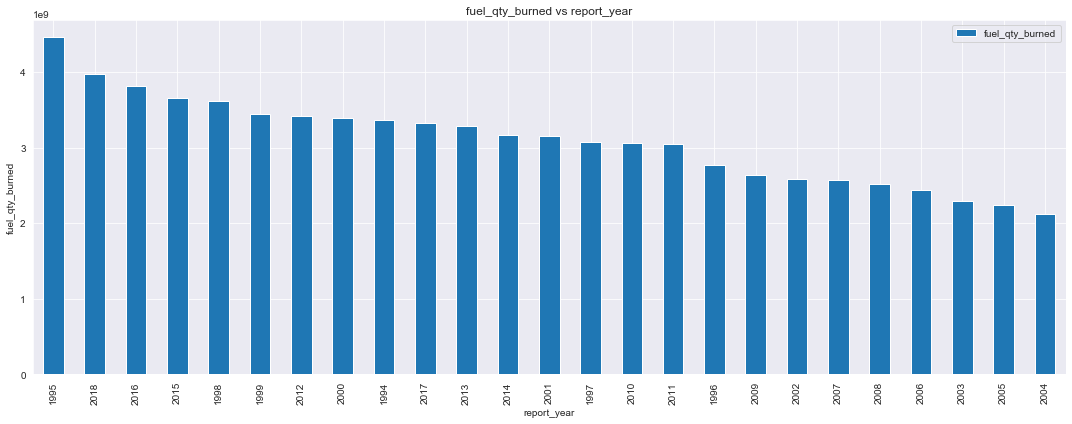

In [73]:
plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
fuel_data.groupby("report_year").sum()["fuel_qty_burned"].sort_values(ascending=False).plot(kind="bar")
plt.ylabel('fuel_qty_burned')
plt.title('fuel_qty_burned vs report_year')
plt.tight_layout()
plt.legend(loc=1)

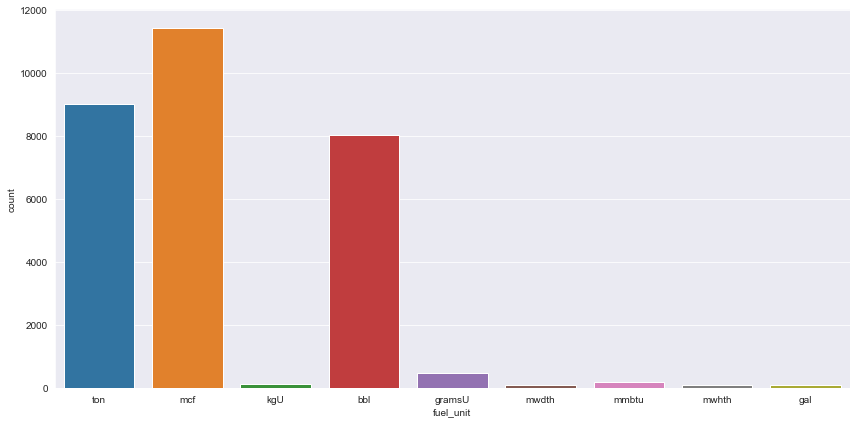

In [77]:
plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
sns.countplot(x='fuel_unit',data=fuel_data)
plt.tight_layout()

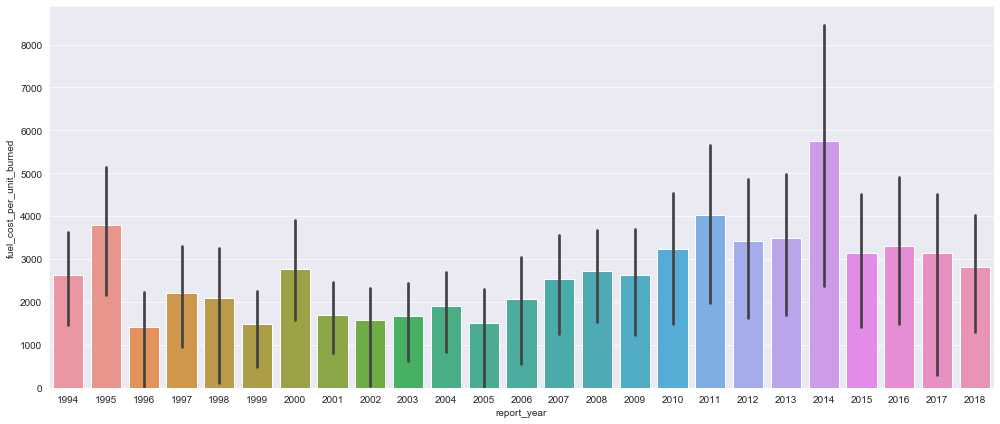

In [80]:
plt.figure(figsize=(14,6))
sns.set_style("darkgrid")
sns.barplot(data=fuel_data, x='report_year', y='fuel_cost_per_unit_burned', estimator=np.std) #standard deviation
plt.tight_layout()




In [83]:
fuel_data.dtypes

record_id                        object
utility_id_ferc1                  int64
report_year                       int64
plant_name_ferc1                 object
fuel_type_code_pudl              object
fuel_unit                        object
fuel_qty_burned                 float64
fuel_mmbtu_per_unit             float64
fuel_cost_per_unit_burned       float64
fuel_cost_per_unit_delivered    float64
fuel_cost_per_mmbtu             float64
fcu                             float64
dtype: object

In [85]:
# Generating new features
fuel_data.fuel_cost_burnt=fuel_data.fuel_qty_burned*fuel_data.fuel_cost_per_unit_burned
fuel_data.fuel_cost_per_unit=fuel_data.fuel_cost_per_mmbtu*fuel_data.fuel_mmbtu_per_unit

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
